https://github.com/linkedin/luminol


Luminol is a light weight python library for time series data analysis. The two major functionalities it supports are anomaly detection and correlation. It can be used to investigate possible causes of anomaly. You collect time series data and Luminol can:

Given a time series, detect if the data contains any anomaly and gives you back a time window where the anomaly happened in, a time stamp where the anomaly reaches its severity, and a score indicating how severe is the anomaly compare to others in the time series.
Given two time series, help find their correlation coefficient. Since the correlation mechanism allows a shift room, you are able to correlate two peaks that are slightly apart in time.
Luminol is configurable in a sense that you can choose which specific algorithm you want to use for anomaly detection or correlation. In addition, the library does not rely on any predefined threshold on the values of a time series. Instead, it assigns each data point an anomaly score and identifies anomalies using the scores.

By using the library, we can establish a logic flow for root cause analysis. For example, suppose there is a spike in network latency:

Anomaly detection discovers the spike in network latency time series
Get the anomaly period of the spike, and correlate with other system metrics(GC, IO, CPU, etc.) in the same time range
Get a ranked list of correlated metrics, and the root cause candidates are likely to be on the top.
Investigating the possible ways to automate root cause analysis is one of the main reasons we developed this library and it will be a fundamental part of the future work.

Requirements
```
numpy
scipy
future==0.16.0
```

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate anomaly scores.

In [2]:
from luminol.anomaly_detector import AnomalyDetector

ts = {0: 0, 1: 0.5, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0}

my_detector = AnomalyDetector(ts)
score = my_detector.get_all_scores()
scores = []
for timestamp, value in score.iteritems():
    print(timestamp, value)
    scores.append(value)

0 0.0
1 0.8731282501307988
2 1.5716308502354377
3 2.1363368633427995
4 1.70906949067424
5 2.905418134146207
6 1.1715411093483696
7 0.9372328874786957
8 0.7497863099829566


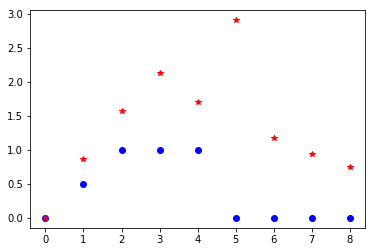

In [7]:
plt.plot(ts.values(), 'bo')
plt.plot(scores, 'r*')

# Correlate ts1 with ts2 on every anomaly.

In [4]:
from luminol.anomaly_detector import AnomalyDetector
from luminol.correlator import Correlator

ts1 = {0: 0, 1: 0.5, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0}
ts2 = {0: 0, 1: 0.5, 2: 1, 3: 0.5, 4: 1, 5: 0, 6: 1, 7: 1, 8: 1}

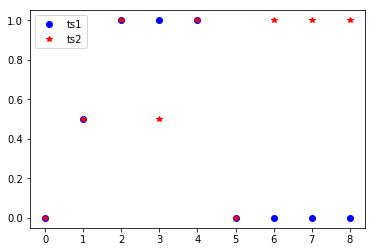

In [5]:
plt.plot(ts1.values(), 'bo', label='ts1')
plt.plot(ts2.values(), 'r*', label='ts2')
plt.legend()

In [6]:
my_detector = AnomalyDetector(ts1, score_threshold=1.5)
score = my_detector.get_all_scores()
anomalies = my_detector.get_anomalies()
for a in anomalies:
    time_period = a.get_time_window()
    my_correlator = Correlator(ts1, ts2, time_period)
    if my_correlator.is_correlated(threshold=0.8):
        print("ts2 correlate with ts1 at time period (%d, %d)" % time_period)

ts2 correlate with ts1 at time period (2, 5)
